In [1]:
from ultralytics import YOLO
from PIL import Image
import torch
from torchvision.models import vgg19
from torchvision import ops
from torchvision import transforms
import numpy as np

In [4]:
test = vgg19(weights = "DEFAULT")

In [5]:
test

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [2]:
yoloModel = YOLO('yolov8n.pt')

In [3]:
testImage = Image.open("C:/Users/josem/Documents/schoolWork/MQP/algonauts2023_transformers#2Leader/algonauts_2023_challenge_data/subj01/training_split/training_images/train-0001_nsd-00013.png")
testImage2 = Image.open("C:/Users/josem/Documents/schoolWork/MQP/algonauts2023_transformers#2Leader/algonauts_2023_challenge_data/subj01/training_split/training_images/train-0105_nsd-00868.png")

In [4]:
tsfms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

In [13]:
import matplotlib.pyplot as plt

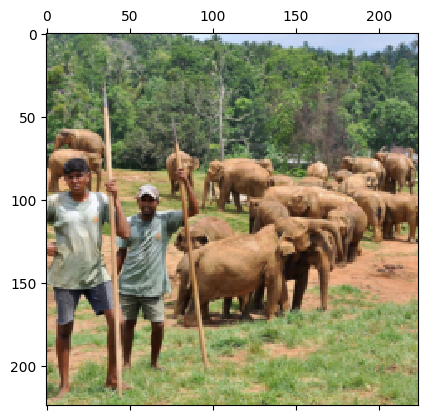

In [15]:
plt.matshow(tsfms(testImage2).permute(1,2,0))

In [22]:
dummyData = torch.vstack((tsfms(testImage)[None, :, :, :], tsfms(testImage2)[None, :, :, :]))

In [23]:
results = yoloModel.predict(dummyData)


0: 224x224 1 chair, 1: 224x224 2 persons, 3 elephants, 324.8ms
Speed: 0.5ms preprocess, 162.4ms inference, 2.5ms postprocess per image at shape (1, 3, 224, 224)


In [35]:
results

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p

In [38]:
test = [result.boxes for result in results]
mappedBoxes = []
for result in test:
    print(result)
    boundingBoxData = result.xyxyn
    boundingBoxStartX, boundingBoxStartY, boundingBoxEndX, boundingBoxEndY = boundingBoxData[:, 0], boundingBoxData[:, 1], boundingBoxData[:, 2], boundingBoxData[:, 3]
    transformedBoundingBoxStartX, transformedBoundingBoxStartY, transformedBoundingBoxEndX, transformedBoundingBoxEndY = boundingBoxStartX * 7, boundingBoxStartY * 7, boundingBoxEndX * 7, boundingBoxEndY * 7
    startCellX = torch.floor(transformedBoundingBoxStartX)
    startCellY = torch.floor(transformedBoundingBoxStartY)
    endCellX = torch.ceil(transformedBoundingBoxEndX)
    endCellY = torch.ceil(transformedBoundingBoxEndY)
    mappedBoxes.append(torch.hstack((torch.tensor(startCellX).reshape(-1,1), torch.tensor(startCellY).reshape(-1,1), torch.tensor(endCellX).reshape(-1,1), torch.tensor(endCellY).reshape(-1,1))))

torch.tensor(mappedBoxes)

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([56.], device='cuda:0')
conf: tensor([0.8569], device='cuda:0')
data: tensor([[1.1782e-01, 1.3346e+02, 6.4672e+01, 2.2363e+02, 8.5695e-01, 5.6000e+01]], device='cuda:0')
id: None
is_track: False
orig_shape: (224, 224)
shape: torch.Size([1, 6])
xywh: tensor([[ 32.3947, 178.5463,  64.5537,  90.1748]], device='cuda:0')
xywhn: tensor([[0.1446, 0.7971, 0.2882, 0.4026]], device='cuda:0')
xyxy: tensor([[1.1782e-01, 1.3346e+02, 6.4672e+01, 2.2363e+02]], device='cuda:0')
xyxyn: tensor([[5.2599e-04, 5.9580e-01, 2.8871e-01, 9.9836e-01]], device='cuda:0')
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([ 0.,  0., 20., 20., 20.], device='cuda:0')
conf: tensor([0.7484, 0.6573, 0.4192, 0.3392, 0.2685], device='cuda:0')
data: tensor([[4.8065e-04, 7.3214e+01, 4.2213e+01, 2.1964e+02, 7.4843e-01, 0.0000e+00],
        [4.0169e+01, 9.1660e+01, 8.0540e+01, 2.0817e+02, 6.5734e-01, 0.0000e+00],
        [8.6638e+01, 1.1

C:\Users\josem\AppData\Local\Temp\ipykernel_33088\2986225708.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mappedBoxes.append(torch.hstack((torch.tensor(startCellX).reshape(-1,1), torch.tensor(startCellY).reshape(-1,1), torch.tensor(endCellX).reshape(-1,1), torch.tensor(endCellY).reshape(-1,1))))


ValueError: only one element tensors can be converted to Python scalars

RuntimeError: stack expects each tensor to be equal size, but got [1, 4] at entry 0 and [5, 4] at entry 1

In [31]:
type(results[0])

ultralytics.engine.results.Results

In [27]:
boundingBoxData = results[0].boxes.xywh

In [30]:
boundingBoxData.cpu().numpy()

array([[     21.107,      146.43,      42.213,      146.43],
       [     60.355,      149.91,       40.37,      116.51],
       [     115.81,      148.07,      58.343,      56.283],
       [     116.54,      91.471,      44.094,       32.47],
       [     126.54,      143.92,      91.823,      60.316]], dtype=float32)

In [4]:
boundingBoxData[0].reshape(-1, 1)

tensor([[0.],
        [2.],
        [2.],
        [7.]])

In [4]:
boundingBoxStartX, boundingBoxStartY, boundingBoxEndX, boundingBoxEndY = boundingBoxData[:, 0], boundingBoxData[:, 1], boundingBoxData[:, 2], boundingBoxData[:, 3]

In [10]:
boundingBoxStartX * .97

tensor([0.0000, 0.9700, 1.9400, 1.9400, 1.9400])

In [12]:
torch.ceil(boundingBoxStartX * .97)

tensor([0., 1., 2., 2., 2.])

In [10]:
test = torch.rand(1, 512, 7, 7)

In [13]:
torch.flatten(test).shape

torch.Size([25088])

In [18]:
for i in results:
    data = i.boxes
    # print(data.xywh.cpu().numpy())
    boundingBoxData = data.xyxyn
    boundingBoxStartX, boundingBoxStartY, boundingBoxEndX, boundingBoxEndY = boundingBoxData[:, 0], boundingBoxData[:, 1], boundingBoxData[:, 2], boundingBoxData[:, 3]

    transformedBoundingBoxStartX, transformedBoundingBoxStartY, transformedBoundingBoxEndX, transformedBoundingBoxEndY = boundingBoxStartX * 7, boundingBoxStartY * 7, boundingBoxEndX * 7, boundingBoxEndY * 7
    startCellX = torch.floor(transformedBoundingBoxStartX)
    startCellY = torch.floor(transformedBoundingBoxStartY)

    endCellX = torch.ceil(transformedBoundingBoxEndX)
    endCellY = torch.ceil(transformedBoundingBoxEndY)

    print(boundingBoxStartX[0], boundingBoxStartY[0], boundingBoxEndX[0], boundingBoxEndY[0])
    print(transformedBoundingBoxStartX[0], transformedBoundingBoxStartY[0], transformedBoundingBoxEndX[0], transformedBoundingBoxEndY[0])
    print(startCellX, startCellY, endCellX, endCellY)
    
    boundingBoxData = torch.hstack((torch.reshape(torch.tensor(startCellX), (-1,1)), torch.reshape(torch.tensor(startCellY), (-1,1)), torch.reshape(torch.tensor(endCellX), (-1,1)), torch.reshape(torch.tensor(endCellY), (-1,1))))
    # print(ops.roi_pool())

    # torch.cat((torch.reshape(torch.tensor(startCellX), (-1,1)), torch.reshape(torch.tensor(startCellY), (-1,1)), torch.reshape(torch.tensor(endCellX), (-1,1)), torch.reshape(torch.tensor(endCellY), (-1,1))),1)
    roiPooled = ops.roi_pool(testAvgPool.to("cuda:0"), [newBBData.to("cuda:0")], output_size = (7,7))
    # newBBData = torch.cat((torch.reshape(torch.tensor(startCellX), (-1,1)), torch.reshape(torch.tensor(startCellY), (-1,1)), torch.reshape(torch.tensor(endCellX), (-1,1)), torch.reshape(torch.tensor(endCellY), (-1,1))),1)
    torch.hstack((torch.reshape(torch.tensor(startCellX), (-1,1)), torch.reshape(torch.tensor(startCellY), (-1,1)), torch.reshape(torch.tensor(endCellX), (-1,1)), torch.reshape(torch.tensor(endCellY), (-1,1))))
    # boundingBoxData = data.xyxyn.cpu().numpy()
    # boundingBoxStartX, boundingBoxStartY, boundingBoxWidth, boundingBoxHeight = boundingBoxData[:, 0], boundingBoxData[:, 1], boundingBoxData[:, 2], boundingBoxData[:, 3]

    # transformedBoundingBoxStartX, transformedBoundingBoxStartY, transformedBoundingBoxWidth, transformedBoundingBoxHeight = boundingBoxStartX * 7, boundingBoxStartY * 7, boundingBoxWidth * 7, boundingBoxHeight * 7
    # startCellX = np.floor(transformedBoundingBoxStartX)
    # startCellY = np.floor(transformedBoundingBoxStartY)

    # endCellX = np.ceil(transformedBoundingBoxStartX + transformedBoundingBoxWidth)
    # endCellY = np.ceil(transformedBoundingBoxStartY + transformedBoundingBoxHeight)

    # print(boundingBoxStartX[0], boundingBoxStartY[0], boundingBoxWidth[0], boundingBoxHeight[0])
    # print(transformedBoundingBoxStartX[0], transformedBoundingBoxStartY[0], transformedBoundingBoxWidth[0], transformedBoundingBoxHeight[0])
    # print(startCellX[0], startCellY[0], endCellX[0], endCellY[0])


    # classPred = data.cls
    # confidence = data.conf
    # boundingBoxPos = data.xywh

    # print(classPred)
    # print(confidence)
    # print(boundingBoxPos)

tensor(2.1458e-06, device='cuda:0') tensor(0.3268, device='cuda:0') tensor(0.1885, device='cuda:0') tensor(0.9806, device='cuda:0')
tensor(1.5020e-05, device='cuda:0') tensor(2.2879, device='cuda:0') tensor(1.3192, device='cuda:0') tensor(6.8639, device='cuda:0')
tensor([0., 1., 2., 2., 2.], device='cuda:0') tensor([2., 2., 3., 2., 3.], device='cuda:0') tensor([2., 3., 5., 5., 6.], device='cuda:0') tensor([7., 7., 6., 4., 6.], device='cuda:0')


In [41]:
test = torch.rand(2, 100)

In [47]:
lili = []

In [53]:
torch.stack(lili).shape

torch.Size([2, 100])

In [23]:
tsfms(testImage2).permute(1,2,0).cpu().numpy().shape

(224, 224, 3)

In [31]:
import cv2
import numpy as np

def draw_boxes(image, boxes, class_names, confidence_threshold=0.5):
    # Iterate through the detected boxes
    for box in boxes:
        x, y, width, height = box

        # Filter boxes based on confidence threshold
        # if confidence >= confidence_threshold:
        # Convert relative coordinates to absolute coordinates
        h, w, _ = image.shape
        x = int(x * w)
        y = int(y * h)
        width = int(width * w)
        height = int(height * h)

        # Calculate box coordinates
        x_min, y_min = x - width // 2, y - height // 2
        x_max, y_max = x_min + width, y_min + height

        # Draw bounding box on the image
        color = (0, 255, 0)  # Green color
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), color, 2)

        # # Display class label and confidence
        # label = f"{class_names[class_index]}: {confidence:.2f}"
        # cv2.putText(image, label, (x_min, y_min - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    return image

# Example bounding box data
# Each box is represented as (class_index, confidence, x, y, width, height)
bounding_boxes = [
    [     21.107,      146.43,      42.213,      146.43],
    [     60.355,      149.91,       40.37,      116.51],
    [     115.81,      148.07,      58.343,      56.283],
    [     116.54,      91.471,      44.094,       32.47],
    [     126.54,      143.92,      91.823,      60.316]
]

# Example class names
class_names = ["Class A", "Class B"]

# Example image
image_path = "C:/Users/josem/Documents/schoolWork/MQP/algonauts2023_transformers#2Leader/algonauts_2023_challenge_data/subj01/training_split/training_images/train-0105_nsd-00868.png"
original_image = cv2.imread(image_path)
original_image = cv2.resize(original_image, (224, 224))

# Draw bounding boxes on the original image
image_with_boxes = draw_boxes(original_image.copy(), bounding_boxes, class_names)

# Display the original and annotated images
cv2.imshow("Original Image", original_image)
cv2.imshow("Image with Bounding Boxes", image_with_boxes)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
class ROIVGG(torch.nn.Module):
    def __init__(self, numClasses: int, numROIs: int, cocoVGGWeights:str = None, device: str = "cuda"):
        super(ROIVGG, self).__init__()
        self.cocoVgg19 = CocoVGG(numClasses)
        if cocoVGGWeights is not None:
            self.cocoVgg19.load_state_dict(torch.load(cocoVGGWeights, map_location=device))
            
        self.convFeatures = self.cocoVgg19.features[:36]
        self.maxPool = torch.nn.MaxPool2d(kernel_size = 2, stride = 2, padding = 0, dilation = 1, ceil_mode = False)
        self.adaptiveAvgPool = torch.nn.AdaptiveAvgPool2d(output_size = (7, 7))
        self.cocoClassifier = self.cocoVgg19.classifier
        self.roiClassifier = torch.nn.Sequential(
            torch.nn.Linear(in_features = 25088, out_features = 4096),
            torch.nn.ReLU(inplace=True),
            torch.nn.Linear(in_features = 4096, out_features = 1024),#1024
            torch.nn.ReLU(inplace=True),
            torch.nn.Linear(in_features = 1024, out_features = numROIs)
        )
        self.gradients = None
    def activations_hook(self, grad):
        self.gradients = grad
    def forward(self, img):
        extractedFeatures = self.convFeatures(img)
        # hook = extractedFeatures.register_hook(self.activations_hook)
        intermediateOutput = self.maxPool(extractedFeatures)
        intermediateOutput = self.adaptiveAvgPool(intermediateOutput)
        intermediateOutput = torch.flatten(intermediateOutput, 1)
        return self.cocoClassifier(intermediateOutput), self.roiClassifier(intermediateOutput)
    def get_activation_gradient(self):
        return self.gradients
    def get_activations(self, img):
        return self.convFeatures(img)
    def __str__(self):
        return ""
    def __repr__(self):
        return ""

In [17]:
class roiVGGYolo(torch.nn.Module):
    def __init__(self, numROIs: int):
        super(roiVGGYolo, self).__init__()
        self.vgg = vgg19(weights = "DEFAULT")
        for params in self.vgg.parameters():
            params.requires_grad = False

        self.yolo = YOLO("yolov8n.pt")
        for params in self.yolo.parameters():
            params.requires_grad = False

        self.MLP = torch.nn.Sequential(
            torch.nn.Linear(25088, 4096),
            torch.nn.ReLU(),
            torch.nn.Linear(4096, 1024),
            torch.nn.ReLU(),
            torch.nn.Linear(1024, numROIs),
        )

    def forward(self, img):
        pooling = self.vgg.features(img)
        pooling = self.vgg.avgpool(pooling)
        yoloResults = [results.boxes for results in self.yolo.predict(img)]

        boundingBoxDataAllImages = self.getMappedBoundingBox(yoloResults)
        finalFMRIs = []
        for boundingBoxData in boundingBoxDataAllImages:
            objectROIPools = ops.roi_pool(pooling, [boundingBoxData])

            fmriPieces = []
            for objectROIPool in objectROIPools:
                input = torch.flatten(objectROIPool)
                fmriPieces.append(self.MLP(input))

            totalFMRI = torch.sum(torch.stack(fmriPieces), dim=0)
            finalFMRIs.append(totalFMRI)

        return torch.stack(finalFMRIs)
            
    def getMappedBoundingBox(self, yoloResults):
        mappedBoxes = []
        for result in yoloResults:
            boundingBoxData = result.xyxyn
            boundingBoxStartX, boundingBoxStartY, boundingBoxEndX, boundingBoxEndY = boundingBoxData[:, 0], boundingBoxData[:, 1], boundingBoxData[:, 2], boundingBoxData[:, 3]
            transformedBoundingBoxStartX, transformedBoundingBoxStartY, transformedBoundingBoxEndX, transformedBoundingBoxEndY = boundingBoxStartX * 7, boundingBoxStartY * 7, boundingBoxEndX * 7, boundingBoxEndY * 7
            startCellX = torch.floor(transformedBoundingBoxStartX)
            startCellY = torch.floor(transformedBoundingBoxStartY)
            endCellX = torch.ceil(transformedBoundingBoxEndX)
            endCellY = torch.ceil(transformedBoundingBoxEndY)
            mappedBoxes.append(torch.hstack((torch.tensor(startCellX).reshape(-1,1), torch.tensor(startCellY).reshape(-1,1), torch.tensor(endCellX).reshape(-1,1), torch.tensor(endCellY).reshape(-1,1))))

        return mappedBoxes
        
        


            
            

IndentationError: expected an indented block after 'for' statement on line 5 (195062993.py, line 7)